In [50]:
import networkx as nx
import matplotlib.pyplot as plt

[(1, 2, {'weight': 1}),
 (1, 3, {'weight': 2}),
 (1, 4, {'weight': 3}),
 (4, 3, {'weight': 4})]

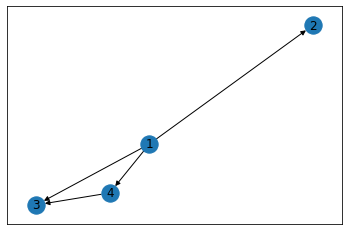

In [51]:
G_w = nx.DiGraph()
edges_list = [
    (1,2,1),
    (1,3,2),
    (1,4,3),
    (4,3,4)
]
G_w.add_weighted_edges_from(edges_list)
nx.draw_networkx(G = G_w)
list(G_w.edges(data=True))

edge_labels: {(1, 2): 1, (1, 3): 2, (1, 4): 3, (4, 3): 4}


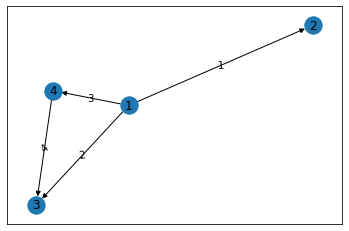

In [52]:
#自定义可视化，在边上展示权重
edge_labels = nx.get_edge_attributes(G_w, "weight")
print('edge_labels:',edge_labels)
pos = nx.spring_layout(G_w) 
nx.draw_networkx_edge_labels(G_w, pos, edge_labels=edge_labels)  # 绘制图中边的权重
nx.draw_networkx(G_w, pos)

# 1.度

## 1.1 度

In [53]:
# 度
G = G_w.copy()
G.degree()

DiDegreeView({1: 3, 2: 1, 3: 2, 4: 2})

## 1.2 入度

In [54]:
# 入度
G.in_degree()

InDegreeView({1: 0, 2: 1, 3: 2, 4: 1})

## 1.3 出度

In [55]:
# 出度
G.out_degree()

OutDegreeView({1: 3, 2: 0, 3: 0, 4: 1})

## 1.4 加权度
- 加权度<br>
![](./assets/2023-09-03-20-47-21.png)

In [56]:
# 计算节点的加权度
G.degree(weight='weight')

DiDegreeView({1: 6, 2: 1, 3: 6, 4: 7})

## 1.5 邻居节点
- 与一个给定节点通过一条边直接相连的所有节点。
- 邻居节点
- 出度邻居
- 入度邻居

### 1.5.1 邻居节点计算

In [64]:
# 查找某个节点的邻居节点 （因为上面是有向图，G.neighbors()计算的是出度节点）
neighbors_of_1 = list(G.neighbors(1))
print("Neighbors of node 1:", neighbors_of_1)

Neighbors of node 1: [2, 3, 4]


In [65]:
# 计算并打印所有节点的邻居节点
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    print(f"Neighbors of node {node}: {neighbors}")


Neighbors of node 1: [2, 3, 4]
Neighbors of node 2: []
Neighbors of node 3: []
Neighbors of node 4: [3]


### 1.5.2 出度邻居节点

In [58]:
# 找到节点1的出度邻居
out_neighbors_of_1 = list(G.successors(1))
print("Out-neighbors of node 1:", out_neighbors_of_1)

Out-neighbors of node 1: [2, 3, 4]


In [69]:
# 计算并打印所有节点的邻居节点
for node in G.nodes():
    neighbors = list(G.successors(node))
    print(f"Out-neighbors of node {node}: {neighbors}")


Out-neighbors of node 1: [2, 3, 4]
Out-neighbors of node 2: []
Out-neighbors of node 3: []
Out-neighbors of node 4: [3]


### 1.5.3 入度邻居节点

In [68]:
# 计算并打印所有节点的邻居节点
for node in G.nodes():
    neighbors = list(G.predecessors(node))
    print(f"In-neighbors of node {node}: {neighbors}")

In-neighbors of node 1: []
In-neighbors of node 2: [1]
In-neighbors of node 3: [1, 4]
In-neighbors of node 4: [1]


# 2.节点数、边数

In [31]:
# 节点的数量
nx.number_of_nodes(G=G)

4

In [32]:
# or
len(G)

4

In [33]:
nx.number_of_edges(G=G)

4

# 3.最短路径
- [shortest_path()](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#shortest-path)

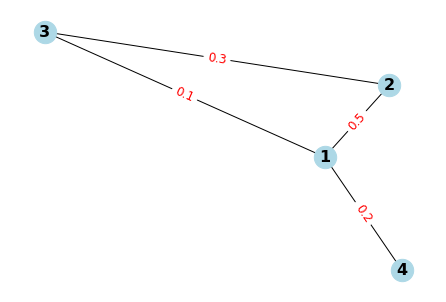

In [34]:
# 创建一个带权图
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])

## 添加带权边
G.add_edge(1, 2, weight=0.5)
G.add_edge(2, 3, weight=0.3)
G.add_edge(3, 1, weight=0.1)
G.add_edge(4, 1, weight=0.1)
G.add_edge(4, 1, weight=0.2)

# 绘制图形
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_color='red')
plt.show()

# nx.to_numpy_matrix(G=G)

## 3.1 最短路径(不带权重)
- 定义：两个节点之间的最短路径上的边数
- source :起始节点
- target :终止节点
- weight : 边属性

In [35]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 3, {'weight': 0.1}), (1, 4, {'weight': 0.2}), (2, 3, {'weight': 0.3})])

In [36]:
# 最短路径(不带权重)
nx.shortest_path(G=G,source=4,target=2,weight=None)

[4, 1, 2]

In [37]:
# 最短路径长度
nx.shortest_path_length(G=G,source=4,target=2,weight=None)

2

## 3.2 最短路径(带权重)

In [38]:
# 最短路径(带权重)
nx.shortest_path(G=G,source=4,target=2,weight='weight') 

[4, 1, 3, 2]

In [39]:
nx.shortest_path_length(G=G,source=4,target=2,weight='weight') 

0.6000000000000001

加权时的最短路径是4-1-2，从加权、非加权的最短路径可以看出，不路径长度为2;加权时为4-1-3-2，路径长度为：0.6

# 4.计算图中所有的最短路径

In [40]:
nx.shortest_path(G=G) # 无加权，所有节点之间的最短路径

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 1, 4]},
 4: {4: [4], 1: [4, 1], 2: [4, 1, 2], 3: [4, 1, 3]}}

In [41]:
# 点-点对之间的最短路径
dict(nx.all_pairs_dijkstra_path(G=G,weight='weight'))

{1: {1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 3, 1], 3: [2, 3], 4: [2, 3, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 1, 4]},
 4: {4: [4], 1: [4, 1], 2: [4, 1, 3, 2], 3: [4, 1, 3]}}

In [42]:
# 点-点对之间的最短路径长度
dict(nx.all_pairs_dijkstra_path_length(G=G,weight='weight'))

{1: {1: 0, 3: 0.1, 4: 0.2, 2: 0.4},
 2: {2: 0, 3: 0.3, 1: 0.4, 4: 0.6000000000000001},
 3: {3: 0, 1: 0.1, 2: 0.3, 4: 0.30000000000000004},
 4: {4: 0, 1: 0.2, 3: 0.30000000000000004, 2: 0.6000000000000001}}

In [43]:
# 计算点-点对之间的最短路径和最短路径长度
dict(nx.all_pairs_dijkstra(G=G,weight='weight'))

{1: ({1: 0, 3: 0.1, 4: 0.2, 2: 0.4},
  {1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 4]}),
 2: ({2: 0, 3: 0.3, 1: 0.4, 4: 0.6000000000000001},
  {2: [2], 1: [2, 3, 1], 3: [2, 3], 4: [2, 3, 1, 4]}),
 3: ({3: 0, 1: 0.1, 2: 0.3, 4: 0.30000000000000004},
  {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 1, 4]}),
 4: ({4: 0, 1: 0.2, 3: 0.30000000000000004, 2: 0.6000000000000001},
  {4: [4], 1: [4, 1], 2: [4, 1, 3, 2], 3: [4, 1, 3]})}